# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص چهره با روش یادگیری عمیق در Opencv</div>

# 1. ایجاد محیط مجازی (در ترمینال)
python -m venv myenv

# 2. فعال‌سازی محیط (ویندوز)
myenv\Scripts\activate

# 3. نصب OpenCV (پس از فعال‌سازی محیط)
pip install opencv-python

# 4. اجرای اسکریپت پایتون
python your_script.py

In [14]:
!pip install opencv-python opencv-python-headless

In [15]:
pip install opencv-python numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
print(cv2.__version__)  # نیاز به بالا 4.5.4+

4.11.0


In [17]:
pip install --upgrade opencv-python opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "C:/Users/Matin/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)

image = cv2.imread("D:/exam/face_image1.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)

In [22]:
import cv2
import numpy as np
import urllib.request
import os


model_path = r'C:\Users\Matin\face_detection_yunet_2023mar.onnx'

# بارگذاری تصویر
image = cv2.imread("D:/exam/face_image1.jpg")
if image is None:
    raise ValueError("تصویر بارگذاری نشد")

# ایجاد دیتکتور با مدل دانلود شده
detector = cv2.FaceDetectorYN.create(
    model_path,  # استفاده از مسیر مدل دانلود شده
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)

if detector is None:
    raise RuntimeError("مدل بارگذاری نشد")

# تنظیم اندازه ورودی
height, width = image.shape[:2]
detector.setInputSize((width, height))

# تشخیص چهره
_, faces = detector.detect(image)

if faces is not None:
    print(f"تعداد چهره‌های تشخیص داده شده: {len(faces)}")
    for idx, face in enumerate(faces, 1):
        print(f"چهره {idx}: {face}")
else:
    print("چهره‌ای تشخیص داده نشد")

تعداد چهره‌های تشخیص داده شده: 1
چهره 1: [374.6215    265.0135    349.69476   445.85178   441.69775   429.07764
 595.77966   435.19522   494.7504    528.67065   444.92084   593.74536
 576.0331    599.5285      0.9050989]


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش خروجی مدل</div>

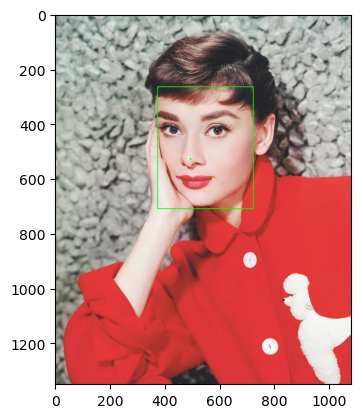

In [27]:
thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.imshow(image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تست با وبکم</div>

In [28]:
import cv2

detector = cv2.FaceDetectorYN.create(
    "C:/Users/Matin/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)


cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
detector.setInputSize((width, height))


while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = detector.detect(frame)
    thickness=2
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(frame, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(frame, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(frame, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(frame, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(frame, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی خروجی مدل روی بزرگترین سلفی جهان!</div>

number of detected faces: 821


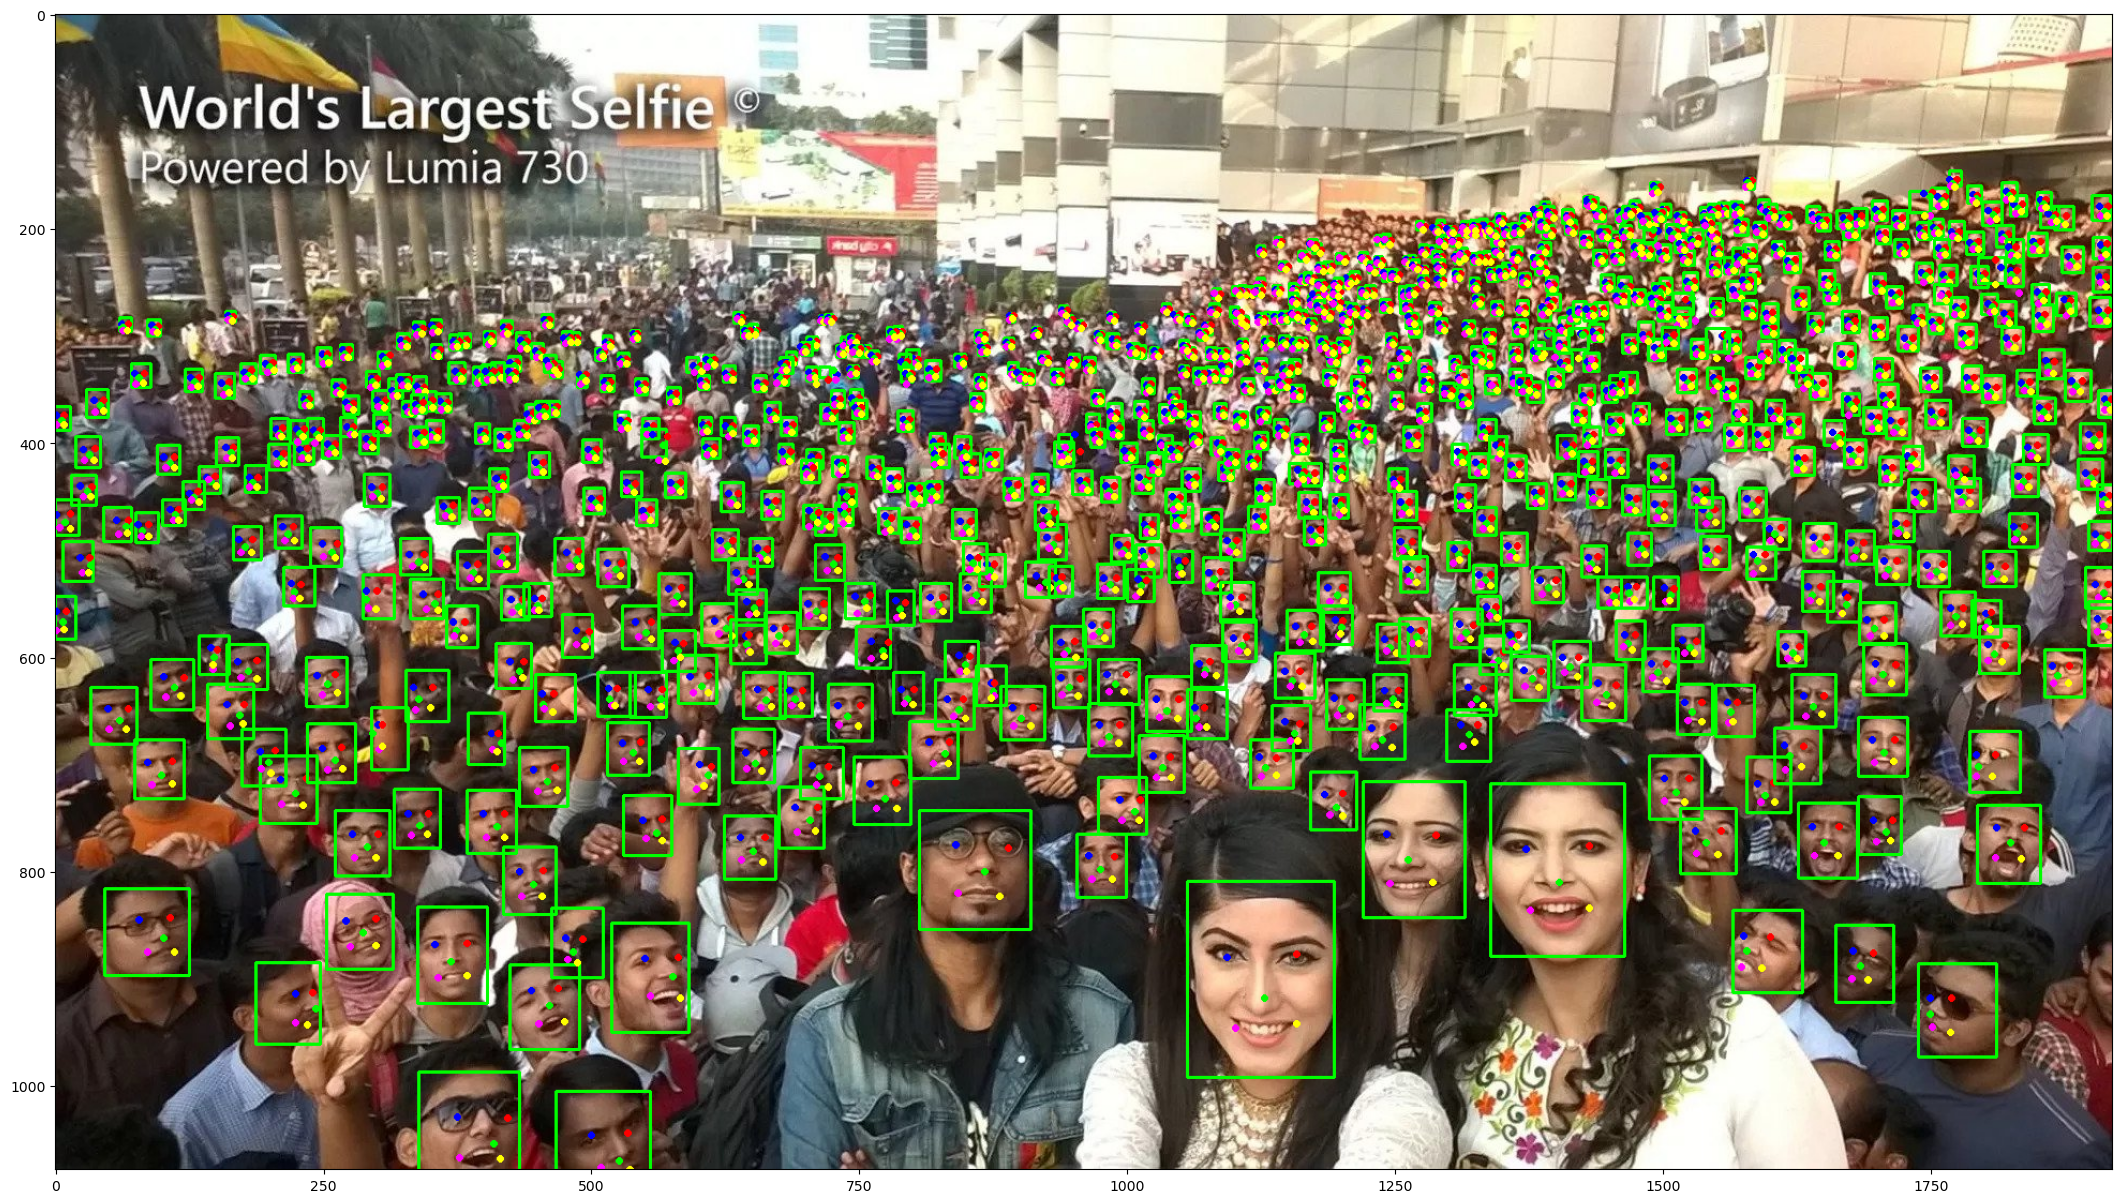

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "C:/Users/Matin/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.3,
    0.2,
    5000
)

image = cv2.imread("images/largest-selfie.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)
print("number of detected faces:", len(result[1]))

thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.figure(figsize=[30,15])
plt.imshow(image[...,::-1]);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">زمان اجرای مدل:</div>

In [30]:
%timeit detector.detect(image)

134 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


https://docs.opencv.org/4.x/d0/dd4/tutorial_dnn_face.html?msclkid=bbba05a1af3911eca0d1cf4ec0faac6c